# Bike Sharing Project
##### this project is to predict how many demands for using a bike sharing facility in a city

##### Step by step to solve this project
1. Read the data
2. Prelim analysis and feature selection
3. Data visualisation and Check multiple linear regression assumptions
4. Drop irrelevant feature
5. Modify new features
6. Create dummies variables for categorical features
7. Create split dataset
8. Training and score model

## 1. Import library

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [287]:
bike = pd.read_csv('hour.csv')
bike.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 2. Prelim analysis and feature selection

#### Understanding data

that dataset have 2 type variable (Descrete : date, season, year, month, hour, holiday, weekday, working day, and weather) (Countinous: tempt, atemp, humidity, windspeed, casual, registered, and demand). But in here we won't to use variable index and date, because varibale date has represented by year, month, and weekdays. we also droping column casual and registered because these are 2 variable if we amount these will be a column demand that we will use as variable dependent

In [288]:
bike_copy = bike.copy()
bike_prepro = bike_copy.drop(['index','date','casual','registered'],axis=1)

print("season : "+ str(bike['season'].unique()))
print("year : "+ str(bike['year'].unique()))
print("month : "+ str(bike['month'].unique()))
print("hour : "+ str(bike['hour'].unique()))
print("holiday : "+ str(bike['holiday'].unique()))
print("weekday : "+ str(bike['weekday'].unique()))
print("workingday : "+ str(bike['workingday'].unique()))
print("weather : "+ str(bike['weather'].unique()))

season : [1 2 3 4]
year : [0 1]
month : [ 1  2  3  4  5  6  7  8  9 10 11 12]
hour : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
holiday : [0 1]
weekday : [6 0 1 2 3 4 5]
workingday : [0 1]
weather : [1 2 3 4]


##### The following is decoding of the descrete variables
- Season : 1. Spring 2. Summer 3. Fall 4. Winter
- Year : first and second year
- Month : 1 - 12 , January - December
- Hour : 0 - 23, hour in single day
- Holiday : 1. Yes 0. No
- weekday : 0-6, sunday-saturday
- workingday: 0.No 1.Yes
- weather : 
  1. Clear, Few clouds, Partly cloudy
  2. Mist + Cloudy, Mist+Broken clouds, Mist+Few cloud, Mist
  3. Light Snow, Light Rain + Tunderstrom + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstrom + Mist, Snow + Fog

##### The following is decoding of the continous variables
- temp = temperature in the city by detector
- atemp = temperature fill like 

## 3. Data Visualization and Check multiple linear regression assumptions

#### Plotting continous data ( features vs demand )

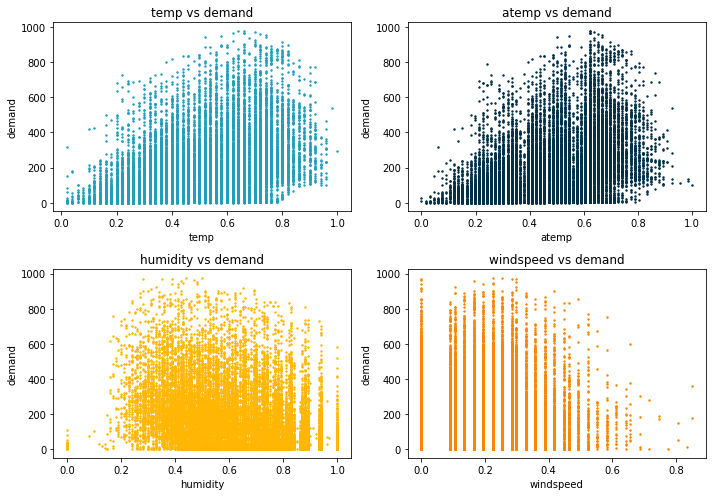

In [289]:
plt.rcParams['figure.figsize']= (10,7)

plt.subplot(2,2,1)
plt.title("temp vs demand")
plt.xlabel("temp")
plt.ylabel("demand")
plt.scatter(bike_prepro['temp'],bike_prepro['demand'],color="#219ebc", s=2)

plt.subplot(2,2,2)
plt.title("atemp vs demand")
plt.xlabel("atemp")
plt.ylabel("demand")
plt.scatter(bike_prepro['atemp'],bike_prepro['demand'],color="#023047", s=2)

plt.subplot(2,2,3)
plt.title("humidity vs demand")
plt.xlabel("humidity")
plt.ylabel("demand")
plt.scatter(bike_prepro['humidity'],bike_prepro['demand'],color="#ffb703", s=2)

plt.subplot(2,2,4)
plt.title("windspeed vs demand")
plt.xlabel("windspeed")
plt.ylabel("demand")
plt.scatter(bike_prepro['windspeed'],bike_prepro['demand'],color="#fb8500", s=2)

plt.tight_layout()

in those plot, we heve new assumption
1. temp and demand have a chance pretty good correlation when the temperature goes up, demand will be increased
2. atemp and demand have a same correlation with temp and demand.
3. windspeed and demand have a chance good negative correlation when the windspeed goes up, demand will be decreased
4. humidity and demand suspected don't have correlation

#### check the features correlation

In [290]:
bike_prepro[['temp','atemp','humidity','windspeed','demand']].corr()

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


based on correlation coefficiet value, we summarize to drop atemp and windspeed, because atemp and temp have a near perfect linear correlation that definitely the multicore linearity , and windspeed has a low correlation coefficiet value with demand or it does not have a linear correlation.

#### Plotting descrete data ( features vs demand )

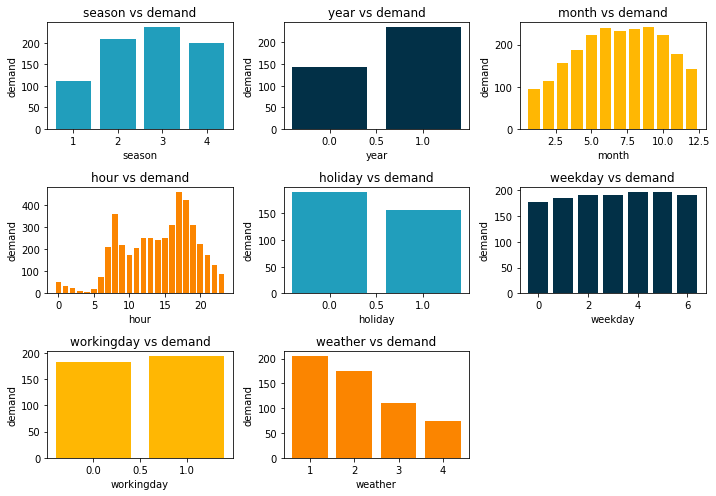

In [291]:
plt.rcParams['figure.figsize']= (10,7)

plt.subplot(3,3,1)
plt.title("season vs demand")
plt.xlabel("season")
plt.ylabel("demand")
cat1 = bike_prepro.groupby(['season'],as_index=False).demand.mean()
plt.bar(cat1['season'],cat1['demand'],color="#219ebc")

plt.subplot(3,3,2)
plt.title("year vs demand")
plt.xlabel("year")
plt.ylabel("demand")
cat2 = bike_prepro.groupby(['year'],as_index=False).demand.mean()
plt.bar(cat2['year'],cat2['demand'],color="#023047")

plt.subplot(3,3,3)
plt.title("month vs demand")
plt.xlabel("month")
plt.ylabel("demand")
cat3 = bike_prepro.groupby(['month'],as_index=False).demand.mean()
plt.bar(cat3['month'],cat3['demand'],color="#ffb703")

plt.subplot(3,3,4)
plt.title("hour vs demand")
plt.xlabel("hour")
plt.ylabel("demand")
cat4 = bike_prepro.groupby(['hour'],as_index=False).demand.mean()
plt.bar(cat4['hour'],cat4['demand'],color="#fb8500")

plt.subplot(3,3,5)
plt.title("holiday vs demand")
plt.xlabel("holiday")
plt.ylabel("demand")
cat5 = bike_prepro.groupby(['holiday'],as_index=False).demand.mean()
plt.bar(cat5['holiday'],cat5['demand'],color="#219ebc")

plt.subplot(3,3,6)
plt.title("weekday vs demand")
plt.xlabel("weekday")
plt.ylabel("demand")
cat6 = bike_prepro.groupby(['weekday'],as_index=False).demand.mean()
plt.bar(cat6['weekday'],cat6['demand'],color="#023047")

plt.subplot(3,3,7)
plt.title("workingday vs demand")
plt.xlabel("workingday")
plt.ylabel("demand")
cat7 = bike_prepro.groupby(['workingday'],as_index=False).demand.mean()
plt.bar(cat7['workingday'],cat7['demand'],color="#ffb703")

plt.subplot(3,3,8)
plt.title("weather vs demand")
plt.xlabel("weather")
plt.ylabel("demand")
cat8 = bike_prepro.groupby(['weather'],as_index=False).demand.mean()
plt.bar(cat8['weather'],cat8['demand'],color="#fb8500")

plt.tight_layout()

variables which have a good variation depending on demand are season, yaar, month, hour, holiday, and weather. weekday and working will drop from the feature because there are hardly any change in the demand or have a low variation value of demand. We will also drop the year variable because it is limited to only 2 year.

#### Check of outliers

In [292]:
bike_prepro['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [293]:
bike_prepro['demand'].quantile([0,0.05,0.10,0.15,0.90,0.95,0.99,1])

0.00      1.00
0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
1.00    977.00
Name: demand, dtype: float64

#### Check autocorrelation of demand

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474893, 0.4704974 , 0.49623   , 0.49404252, 0.46796116,
        0.47732234, 0.52675974, 0.5914597 , 0.6520183 , 0.71519834,
        0.8059134 , 0.9253132 , 1.        , 0.9253132 , 0.8059134 ,
        0.71519834, 0.6520183 , 0.5914597 , 0.52675974, 0.47732234,
        0.46796116, 0.49404252, 0.49623   , 0.4704974 , 0.45474893],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x2354888a910>)

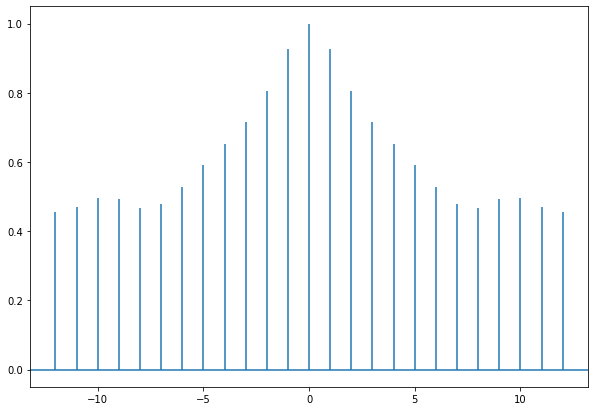

In [294]:
acor_demand = pd.to_numeric(bike_prepro['demand'],downcast='float')
plt.acorr(acor_demand,maxlags=12)

We suspected, it does have a very high autocorrelation of the five previous values for the demand feature. based on the autocorrelation plot, we will use top 4 lines that are significantly high, and we will make sense to use them

#### Check dependent variable

<AxesSubplot:>

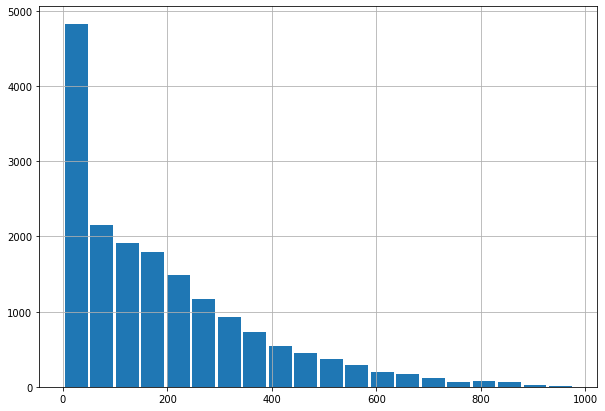

In [295]:
bike_prepro['demand'].hist(rwidth = 0.9 ,bins=20)

there is not normal distribution, resembles very close to the log normal distribution , we will normalize that feature with log function and then see their distribution

## 4. Drop irrelevant features

In [296]:
bike_prepro = bike_prepro.drop(['year','weekday','workingday','atemp','windspeed'],axis=1)
bike_prepro.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


## 5. Modify new feature

#### Log Normalize feature demand

<AxesSubplot:>

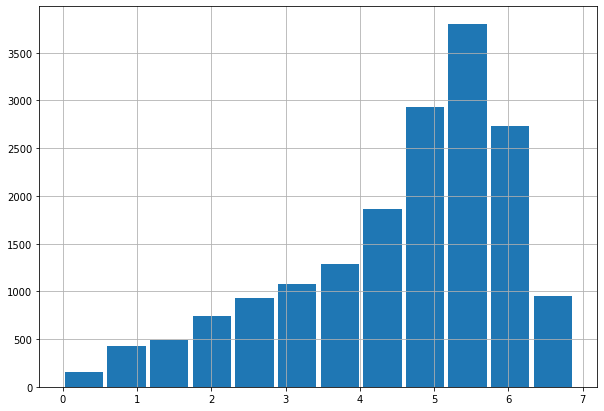

In [297]:
bike_nr = bike_prepro.copy() 
bike_prepro_nr = bike_nr
bike_prepro_nr['demand'] = np.log(bike_nr['demand'])

bike_prepro_nr['demand'].hist(rwidth =0.9 , bins=12)

that histogram of feature demand is fairly normal disributed with log function to convert that

#### Solving the problem of Autocorrelation

based on autocorrelation plot, we will use top three line to solving the problem with making three addtional various independent features column to predict the demand

In [298]:
demand_t1= bike_prepro_nr['demand'].shift(+1).to_frame()
demand_t1.columns = ['t1']
demand_t2= bike_prepro_nr['demand'].shift(+2).to_frame()
demand_t2.columns = ['t2']
demand_t3= bike_prepro_nr['demand'].shift(+3).to_frame()
demand_t3.columns = ['t3']

bike_prepro1 = pd.concat([bike_prepro_nr,demand_t1,demand_t2,demand_t3],axis=1)


bike_prepro1=bike_prepro1.dropna()
bike_prepro1.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t1,t2
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000


## 6. Create dummy variable for categorical features

In [299]:
bike_prepro1['season'] = bike_prepro1['season'].astype('category')
bike_prepro1['month'] = bike_prepro1['month'].astype('category')
bike_prepro1['hour'] = bike_prepro1['hour'].astype('category')
bike_prepro1['holiday'] = bike_prepro1['holiday'].astype('category')
bike_prepro1['weather'] = bike_prepro1['weather'].astype('category')

bike_prepro1 = pd.get_dummies(bike_prepro1, drop_first=True)
bike_prepro1.isnull().sum()

temp         0
humidity     0
demand       0
t1           0
t2           0
season_2     0
season_3     0
season_4     0
month_2      0
month_3      0
month_4      0
month_5      0
month_6      0
month_7      0
month_8      0
month_9      0
month_10     0
month_11     0
month_12     0
hour_1       0
hour_2       0
hour_3       0
hour_4       0
hour_5       0
hour_6       0
hour_7       0
hour_8       0
hour_9       0
hour_10      0
hour_11      0
hour_12      0
hour_13      0
hour_14      0
hour_15      0
hour_16      0
hour_17      0
hour_18      0
hour_19      0
hour_20      0
hour_21      0
hour_22      0
hour_23      0
holiday_1    0
weather_2    0
weather_3    0
weather_4    0
dtype: int64

## 7.  Create Train test split data set

In this case , we wouldn't split data set using library scikit-learn to split random by the demand. demand variable is time-series type of data, we will split by the time-series with ratio 70:30, it means 70 first of the data and 30 end of the data

In [300]:
Y = bike_prepro1['demand']
X = bike_prepro1.drop(['demand'],axis=1)
print(Y.dtypes)
print(X.dtypes)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

x_train = X.values[0 : tr_size]
x_test = X.values[tr_size : len(X)]

y_train = Y.values[0 : tr_size]
y_test = Y.values[tr_size : len(Y)]


float64
temp         float64
humidity     float64
t1           float64
t2           float64
season_2       uint8
season_3       uint8
season_4       uint8
month_2        uint8
month_3        uint8
month_4        uint8
month_5        uint8
month_6        uint8
month_7        uint8
month_8        uint8
month_9        uint8
month_10       uint8
month_11       uint8
month_12       uint8
hour_1         uint8
hour_2         uint8
hour_3         uint8
hour_4         uint8
hour_5         uint8
hour_6         uint8
hour_7         uint8
hour_8         uint8
hour_9         uint8
hour_10        uint8
hour_11        uint8
hour_12        uint8
hour_13        uint8
hour_14        uint8
hour_15        uint8
hour_16        uint8
hour_17        uint8
hour_18        uint8
hour_19        uint8
hour_20        uint8
hour_21        uint8
hour_22        uint8
hour_23        uint8
holiday_1      uint8
weather_2      uint8
weather_3      uint8
weather_4      uint8
dtype: object


## 8. Training and Score Model

In [301]:
regress = LinearRegression()

regress.fit(x_train,y_train)

tr_score = regress.score(x_train,y_train)
ts_score = regress.score(x_test,y_test)

print("train score : "+str(tr_score))
print("test score : "+str(ts_score))

train score : 0.914867753381338
test score : 0.9275483132794007


#### Calculate Root Mean Squared Error

In [302]:
y_predict = regress.predict(x_test)

RMSE = math.sqrt(mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error : "+str(RMSE))

Root Mean Squared Error : 0.38406838694321416


#### Calculate RMSLE and compare result

In [303]:
y_test_e = []
y_predict_e = []

for i in range(0, len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_predict_e.append(math.exp(y_predict[i]))
log_sq_sum = 0.0

for i in range(0, len(y_test_e)):
    log_a = math.log(y_test_e[i] + 1)
    log_p = math.log(y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(y_test))

print(rmsle)

0.358282411260374
